# Story Writer high-level API
To make writing stories as simple as possible, we provide a high-level API. The function `generate_story` can be used for generating a PDF from a prompt. 

In [1]:
from story_writer import generate_story

In [2]:
generate_story("pdfs/cat_story.pdf", """
A cat walks along the street and suddenly jumps into an amazing adventure.
""")

In [3]:
generate_story("pdfs/scientist_story.pdf", """
A scientist walks into the grant office asking for money for their research.
The funding officer shakes their head and explains that the government does not provide funding anymore for research.
The scientist turns around, founds a company and becomes rich and famous.
""", target_audience="young adults")

At this point, the PDFs exist:

In [4]:
!ls pdfs/*.pdf

pdfs/cat_duck_river.pdf
pdfs/cat_story.pdf
pdfs/example.pdf
pdfs/scientist_story.pdf


## Making the teaser image
Just for documentation purposes, we will now turn the two PDFs generated above into PNGs which we can use as teaser images in the documentation of `story-writer`.

To visualize PDFs here, you need to install `pdf2image`, `poppler` and `stackview`, e.g. like this:
```
mamba install -c conda-forge poppler pdf2image stackview
```

StackViewNDArray([[[255, 255, 255],
                   [255, 255, 255],
                   [255, 255, 255],
                   ...,
                   [255, 255, 255],
                   [255, 255, 255],
                   [255, 255, 255]],

                  [[255, 255, 255],
                   [255, 255, 255],
                   [255, 255, 255],
                   ...,
                   [255, 255, 255],
                   [255, 255, 255],
                   [255, 255, 255]],

                  [[255, 255, 255],
                   [255, 255, 255],
                   [255, 255, 255],
                   ...,
                   [255, 255, 255],
                   [255, 255, 255],
                   [255, 255, 255]],

                  ...,

                  [[255, 255, 255],
                   [255, 255, 255],
                   [255, 255, 255],
                   ...,
                   [255, 255, 255],
                   [255, 255, 255],
                   [255, 255, 255]],

                  [[255, 255, 255],
                   [255, 255, 255],
                   [255, 255, 255],
                   ...,
                   [255, 255, 255],
                   [255, 255, 255],
                   [255, 255, 255]],

                  [[255, 255, 255],
                   [255, 255, 255],
                   [255, 255, 255],
                   ...,
                   [255, 255, 255],
                   [255, 255, 255],
                   [255, 255, 255]]], dtype=uint8)
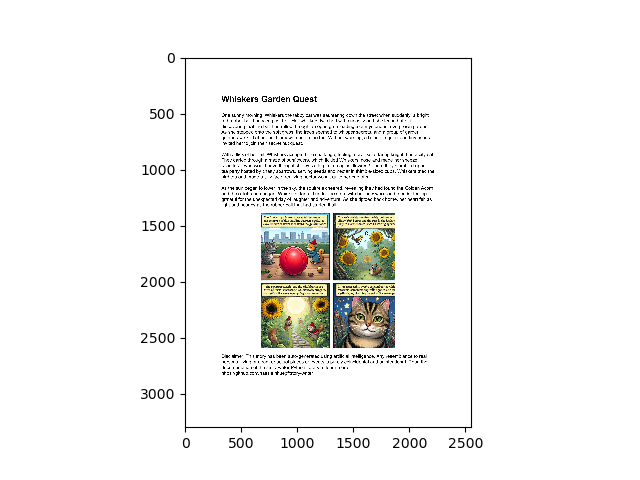
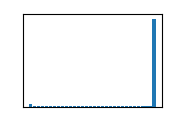

In [5]:
import stackview
from skimage.io import imsave

def pdf_to_numpy(pdf_path, dpi=300):
    from pdf2image import convert_from_path
    import numpy as np

    np_images = []
    images = convert_from_path(pdf_path, dpi=dpi)
    for i, image in enumerate(images):
        image_np = np.array(image)
        np_images.append(image_np)

    return np.asarray(np_images)

images = pdf_to_numpy("pdfs/cat_story.pdf")
stackview.insight(images[0])

We now crop off the margins and save the images so that we can show them as teasers on the github page.

StackViewNDArray([[[255, 255, 255],
                   [255, 255, 255],
                   [255, 255, 255],
                   ...,
                   [255, 255, 255],
                   [255, 255, 255],
                   [255, 255, 255]],

                  [[255, 255, 255],
                   [255, 255, 255],
                   [255, 255, 255],
                   ...,
                   [255, 255, 255],
                   [255, 255, 255],
                   [255, 255, 255]],

                  [[255, 255, 255],
                   [255, 255, 255],
                   [255, 255, 255],
                   ...,
                   [255, 255, 255],
                   [255, 255, 255],
                   [255, 255, 255]],

                  ...,

                  [[255, 255, 255],
                   [255, 255, 255],
                   [255, 255, 255],
                   ...,
                   [255, 255, 255],
                   [255, 255, 255],
                   [255, 255, 255]],

                  [[255, 255, 255],
                   [255, 255, 255],
                   [255, 255, 255],
                   ...,
                   [255, 255, 255],
                   [255, 255, 255],
                   [255, 255, 255]],

                  [[255, 255, 255],
                   [255, 255, 255],
                   [255, 255, 255],
                   ...,
                   [255, 255, 255],
                   [255, 255, 255],
                   [255, 255, 255]]], dtype=uint8)
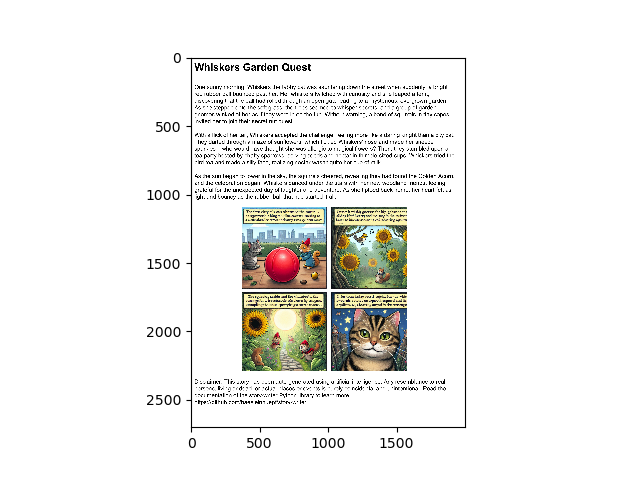
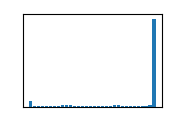

In [6]:
teaser1 = images[0,300:3000,300:2300]
imsave("images/teaser1.png", teaser1)
stackview.insight(teaser1)

StackViewNDArray([[[255, 255, 255],
                   [255, 255, 255],
                   [255, 255, 255],
                   ...,
                   [255, 255, 255],
                   [255, 255, 255],
                   [255, 255, 255]],

                  [[255, 255, 255],
                   [255, 255, 255],
                   [255, 255, 255],
                   ...,
                   [255, 255, 255],
                   [255, 255, 255],
                   [255, 255, 255]],

                  [[255, 255, 255],
                   [255, 255, 255],
                   [255, 255, 255],
                   ...,
                   [255, 255, 255],
                   [255, 255, 255],
                   [255, 255, 255]],

                  ...,

                  [[255, 255, 255],
                   [255, 255, 255],
                   [255, 255, 255],
                   ...,
                   [255, 255, 255],
                   [255, 255, 255],
                   [255, 255, 255]],

                  [[255, 255, 255],
                   [255, 255, 255],
                   [255, 255, 255],
                   ...,
                   [255, 255, 255],
                   [255, 255, 255],
                   [255, 255, 255]],

                  [[255, 255, 255],
                   [255, 255, 255],
                   [255, 255, 255],
                   ...,
                   [255, 255, 255],
                   [255, 255, 255],
                   [255, 255, 255]]], dtype=uint8)
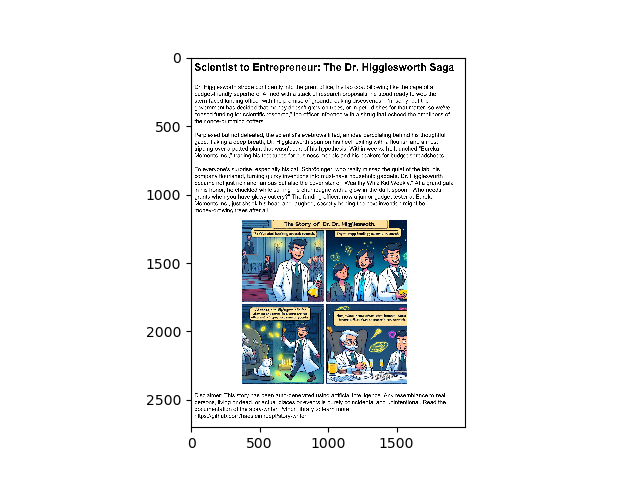
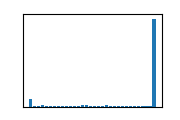

In [7]:
images2 = pdf_to_numpy("pdfs/scientist_story.pdf")
teaser2 = images2[0,300:3000,300:2300]
imsave("images/teaser2.png", teaser2)
stackview.insight(teaser2)